## Logistic Regression Exercise 2

In this exercise we will perform linear regression and logistic regression on the Titanic dataset. But this time we will use multiple predictor variables.

Let's import the data:

In [1]:
import numpy as np
import pandas as pd
# Safe settings for Pandas.
pd.set_option('mode.chained_assignment', 'raise')
%matplotlib inline
import matplotlib.pyplot as plt
# Make the plots look more fancy.
plt.style.use('fivethirtyeight')

# importing the data
titanic = pd.read_csv('https://raw.githubusercontent.com/matthew-brett/cfd2020/master/data/titanic_clean.csv')

titanic.head(10)

,name,gender,age,class,embarked,country,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,United States,7.1100,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,United States,20.0500,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,United States,20.0500,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,Southampton,England,20.0500,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,Southampton,Norway,7.1300,yes
5,"Abelseth, Mr. Olaus Jørgensen",male,25.0,3rd,Southampton,United States,7.1300,yes
6,"Abelson, Mr. Samuel",male,30.0,2nd,Cherbourg,France,24.0000,no
7,"Abelson, Mrs. Hannah",female,28.0,2nd,Cherbourg,France,24.0000,yes
8,"Abī-Al-Munà, Mr. Nāsīf Qāsim",male,27.0,3rd,Cherbourg,Lebanon,18.1509,yes
9,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,3rd,Southampton,Finland,7.1806,yes


# Linear Regression with two predictors

We are going to predict `survived` from `fare` and `age`.

*Question 1:*

Complete the cell below to create a dummy variable for `survived`. Call the dummy variable `survived_dummy`. Again, we will label `survived == 'yes'` as `1` and `survived == 'no'` as `0`.

In [2]:
titanic['survived_dummy'] = titanic['survived'].replace(...)

# show the dataframe
titanic

,name,gender,age,class,embarked,country,fare,survived,survived_dummy
0,"Abbing, Mr. Anthony",male,42.0,3rd,Southampton,United States,7.1100,no,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,Southampton,United States,20.0500,no,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,Southampton,United States,20.0500,no,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,Southampton,England,20.0500,yes,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,Southampton,Norway,7.1300,yes,1
...,...,...,...,...,...,...,...,...,...
1208,"Yvois, Miss. Henriette",female,24.0,2nd,Southampton,France,13.0000,no,0
1209,"Zakarian, Mr. Mapriededer",male,22.0,3rd,Cherbourg,Turkey,7.0406,no,0
1210,"Zakarian, Mr. Ortin",male,27.0,3rd,Cherbourg,Turkey,7.0406,no,0
1211,"Zenni, Mr. Philip",male,25.0,3rd,Cherbourg,Lebanon,7.0406,yes,1


*Question 2:* 

Store `age`, `fare` and `survived_dummy` as separate python variables:

In [3]:
age = ...

fare = ...

survived_dummy = ...

*Question 3:*

Let's look graphically for the relationship between these variables. 

In the cell below, create a scatterplot with `age` on the x axis and `survived_dummy` on the y axis:

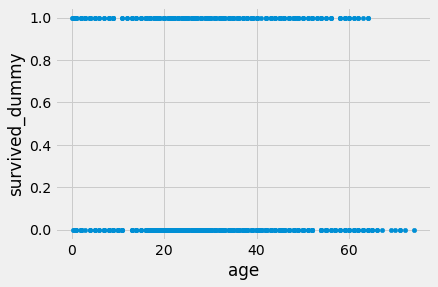

In [4]:
titanic.plot(...);

In the cell below, create a scatterplot with `fare` on the x axis and `survived_dummy` on the y axis:

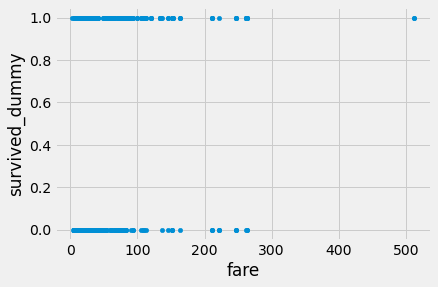

In [5]:
titanic.plot(...);

Can you see any relationships between each predictor and `survived_dummy`?

For example:

*Do passengers who survived seem, on average, to be older?*

*Do passengers who survived seem, on average, to have paid lower fares?*

Run the cell below to have a look at a 3D plot of these variables.

*Note: you can rotate the graph by changing the value of `azim` and re-running the cell:*

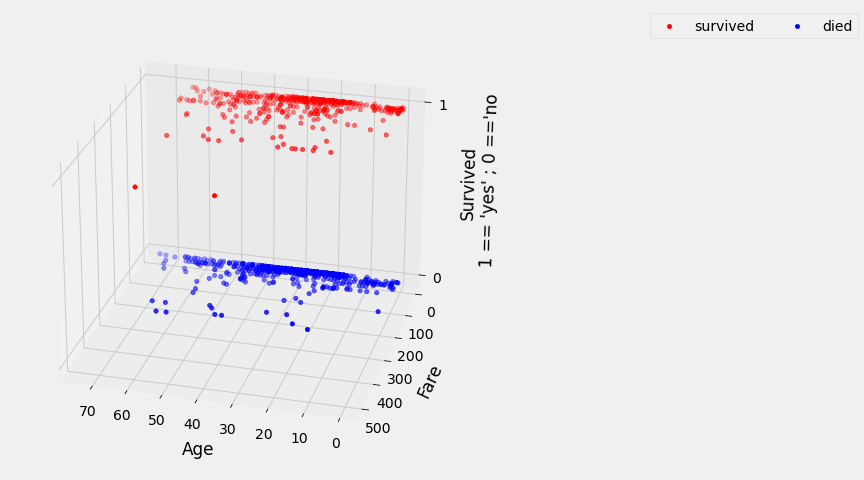

In [6]:
# run this cell, do not worry about the code, it just generates the plot. BUT if you want to, change the value of `azim` and 
# re-run the cell to rotate the plot, to get a different view of the data

azim = 105 # if you want to re-set the graph, the original `azim` value wsa 105

# do not alter the code below this point
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age[survived_dummy == 1], fare[survived_dummy == 1], survived_dummy[survived_dummy == 1],
                                           label = 'survived', color = 'red')
ax.scatter(age[survived_dummy == 0], fare[survived_dummy == 0], survived_dummy[survived_dummy == 0],
           label = 'died', color = 'blue')
plt.xlabel('\nAge')
plt.ylabel('\nFare')
plt.legend(loc='upper center', bbox_to_anchor=(1.6, 1), ncol = 3)
ax.set_zlabel('\n\nSurvived\n 1 == \'yes\' ; 0 ==\'no')
ax.set_zticks([0,1])
ax.view_init(elev= 25, azim = azim)
plt.show()

In the cell below, describe any patterns that you see from the graphs above:

##### Your answer here...

*Question 4:*

To use linear regression to predict `survived_dummy` from `age` and `fare`; we're going to need a function that calculates the sum of squared error, but that can accept two slopes: one slope for `age` and one slope for `fare`.

In this model, our predicted probability of `survived_dummy == 1` is:

$
\text{predicted probability} = intercept + slope_{age} * \text{age} + slope_{fare} * \text{fare}
$

The function below is currently written so that it returns the sum of squared error when predicting `survived_dummy` from `age` only. Modify it so that it also expects a slope for `fare`, and uses this slope (as well as the slope for `age`) to generate its predictions:

In [7]:
def sos_two_slopes(intercept_and_slopes):
    
    intercept = intercept_and_slopes[0]
    
    slope_age = intercept_and_slopes[1]
    
    slope_fare = ...
    
    prediction = intercept + slope_age * age + ...
    
    error = survived_dummy - prediction
    
    return np.sum(error**2)

In [8]:
# run this cell, it should return 8115450.52203827 if your function is working correctly

sos_two_slopes([1,1,1])

8115450.52203827

*Question 5:*

Use `minimize` and the `sos_two_slopes()` function to find the values of the intercept, `age` slope and `fare` slope which minimize the sum of squared error.

Store the results in a variable called `mul_lin_reg`:

In [9]:
from scipy.optimize import minimize

mul_lin_reg = minimize(...)

mul_lin_reg

      fun: 270.73746969218064
 hess_inv: array([[ 2.28596942e-03, -6.04901103e-05, -2.41803223e-06],
       [-6.04901103e-05,  2.16718812e-06, -1.18943135e-07],
       [-2.41803223e-06, -1.18943135e-07,  1.83971486e-07]])
      jac: array([-0.00061035, -0.00198746, -0.00211716])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 241
      nit: 7
     njev: 46
   status: 2
  success: False
        x: array([ 0.40865953, -0.00338724,  0.00245477])

*Question 6:*

Store the intercept, `age` slope and `fare` slope from `mul_lin_reg` in separate variables (called `intercept_lin`, `slope_age_lin` and `slope_fare_lin`):

In [10]:
intercept_lin = ...

slope_age_lin = ...

slope_fare_lin = ...


# do not alter the code below this point

print('Intercept from minimize (linear regression) = ', intercept_lin)
print('Age slope from minimize (linear regression) = ', slope_age_lin)
print('Fare slope from minimize (linear regression) = ', slope_fare_lin)

Intercept from minimize (linear regression) =  0.40865952890470547
Age slope from minimize (linear regression) =  -0.0033872405040527996
Fare slope from minimize (linear regression) =  0.0024547744890347422


*Question 7:*

Check the values you got from `minimize` against those found by Statsmodels.

Complete the code in the cell below to use `smf.ols()` to predict `survived_dummy` from `age` and `fare`:

In [11]:
import statsmodels.formula.api as smf

mod = smf.ols(..., data = ...)

mod = mod.fit()

mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         survived_dummy   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     38.33
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           7.25e-17
Time:                        02:22:13   Log-Likelihood:                -811.60
No. Observations:                1213   AIC:                             1629.
Df Residuals:                    1210   BIC:                             1645.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4087      0.032     12.763      0.000       0.346       0.471
age           -0.0034      0.001     -3.437      0.001      -0.005      -0.001
fare           0.0025      0.000      8.555      0.000       0.002       0.003
==============================================================================
Omnibus:                     6953.158   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.830
Skew:                           0.460   Prob(JB):                     2.18e-37
Kurtosis:                       1.421   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Look under `coef` in the summary table above, and compare these values to the intercept and slopes from `minimize`:

In [12]:
print('Intercept from minimize (linear regression) = ', intercept_lin)
print('Age slope from minimize (linear regression) = ', slope_age_lin)
print('Fare slope from minimize (linear regression) = ', slope_fare_lin)

Intercept from minimize (linear regression) =  0.40865952890470547
Age slope from minimize (linear regression) =  -0.0033872405040527996
Fare slope from minimize (linear regression) =  0.0024547744890347422


*Question 8:*

Use the formula below to calculate the predicted probability of survival, using the intercept and slopes we have just obtained:

$
\text{predicted probability} = intercept + slope_{age} * \text{age} + slope_{fare} * \text{fare}
$

Store the predicted probabilities in a variable called `predictions_lin`:

In [13]:
predictions_lin = intercept_lin + ... * age  + ...

Run the cell below to have a look at the predicted probabilities, from linear regression:

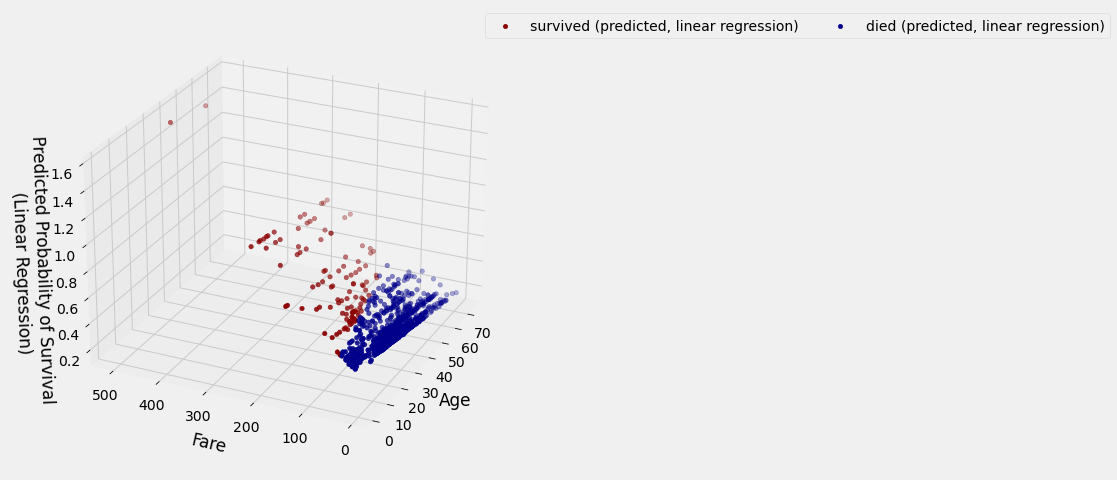

In [14]:
# run this cell, do not worry about the code, it just generates the plot. BUT if you want to, change the value of `azim` and 
# re-run the cell to rotate the plot, to get a different view of the data

azim = 205   # if you want to re-set the graph, the original `azim` value wsa 205

# do not alter the code below this point
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure(figsize = (10,8))
ax1 = fig1.add_subplot(111, projection='3d')

ax1.scatter(age[predictions_lin >= 0.5], fare[predictions_lin >= 0.5], predictions_lin[predictions_lin >= 0.5], 
           label = 'survived (predicted, linear regression)', color = 'darkred')
                                           
ax1.scatter(age[predictions_lin < 0.5], fare[predictions_lin < 0.5], predictions_lin[predictions_lin < 0.5],
           label = 'died (predicted, linear regression)', color = 'darkblue')
plt.xlabel('\nAge')
plt.ylabel('\nFare')
plt.legend(loc='upper center', bbox_to_anchor=(1.6, 1), ncol = 3)
ax1.set_zlabel('\nPredicted Probability of Survival \n(Linear Regression)')
ax1.view_init(elev= 25, azim = azim)
plt.show()

Remember that the predictions from any sort of regression model try to capture the systematic patterns in the data. In a rough sense, they make clearer any pattern that is in the original data.

Ask yourself the same questions as earlier, but about the predictions e.g.:

*Do passengers who are predicted to survive seem, on average, to be older?*

*Do passengers are predicted to survive seem, on average, to have paid lower fares?*

*Note: you may be wondering why the data points are not all either at 0 or 1 on the vertical axis - as they were in the first 3D plot. This is because they now represent probabilities, rather than the `survived_dummy` values. Where the predicted probability is above 0.5, the model predicts the passenger will survive, where it is less than 0.5 it predicts they will not.*  

In the cell below, describe any patterns you see in the 3D graph of the predicted probabilities:

#### Your answer here:

## Logistic regression with multiple predictors

In the 3D graph of the predictions from linear regression, you can see that some of the predicted probabilities are greater than 1. Probability, by definition, must be between 0 and 1, so a linear regression model is not very appropriate for these data.

Let's grab the functions from the logistic regression notebook:

In [15]:
# define the functions we need

def inv_logit(y):
    """ Reverse logit transformation
    """
    odds_ratios = np.exp(y)  # Reverse the log operation.
    return odds_ratios / (odds_ratios + 1)  # Reverse odds ratios operation; return probabilities


def mll_logit_cost(intercept_and_slope, x, y):
    """ Cost function for maximum log likelihood

    Return minus of the log of the likelihood.
    """
    intercept, slope = intercept_and_slope
    
    # Make predictions for sigmoid.
    predicted_log_odds = intercept + slope * x
    pp_of_1 = inv_logit(predicted_log_odds)
    
    # Calculate predicted probabilities of the actual labels.
    pp_of_correct_label = y * pp_of_1 + (1 - y) * (1 - pp_of_1)
    
    # Use logs to calculate log of the likelihood
    log_likelihood = np.sum(np.log(pp_of_correct_label))
    
    # Ask minimize to find maximum by adding minus sign.
    return -log_likelihood

*Question 9:*

We need to adapt the `mll_logit_cost()` function, so that it accepts slopes for multiple predictors, rather than just one.

This is a bit tricky, but is simpler than it seems.

*Only the inputs of the function, how it unpacks the inputs, and the `predicted_log_odds` calculation need to change.*

The cost function above, for one slope, took three inputs: `intercept_and_slope`, `x` and `y`.

`x` is the predictor variable, `y` is the outcome dummy variable.

The prediction in the cost function for one slope is calculated by:

$ \text{predicted_log_odds} = intercept + slope * x $

The adapted function, which we will call `mll_logit_cost_multiple`, needs to take four inputs: `intercept_and_slopes`, `x1`, `x2` and `y`.

`x1` and `x2` are the two predictors (which in our case will be `age` and `fare`).

The prediction in the adapted function should be calculated by:

$ \text{predicted_log_odds} = intercept + slope_1 * x1 + slope_2 * x2 $

The inputs of the function have already been adapted for you:

In [16]:
def mll_logit_cost_multiple(intercept_and_slopes, x1, x2, y):
    """ Cost function for maximum log likelihood

    Return minus of the log of the likelihood.
    """
    # THIS NEEDS TO CHANGE
    intercept, slope_1 = intercept_and_slopes
    
    # Make predictions for sigmoid (THIS NEEDS TO CHANGE)
    predicted_log_odds = intercept + slope_1 * x1 + ...
    
    # the code below this point can stay the same
    pp_of_1 = inv_logit(predicted_log_odds)
    # Calculate predicted probabilities of actual labels.
    pp_of_correct_label = y * pp_of_1 + (1 - y) * (1 - pp_of_1)
    # Use logs to calculate log of the likelihood
    log_likelihood = np.sum(np.log(pp_of_correct_label))
    # Ask minimize to find maximum by adding minus sign.
    return -log_likelihood

Run the cell below to test your function with a guess of `[0.1, 0.1, 0.1]` for the intercept, `age` slope and `fare` slope.

The function should return 4115.976827302091 if you have adapted it correctly:

In [17]:
# run this cell to check your function
mll_logit_cost_multiple([0.1, 0.1, 0.1], age, fare, survived_dummy)

4115.976827302091

*Question 10:*

Use `minimize` to perform a logistic regression, predicting `survived_dummy` from `age` and `fare`.

*Note: keep your initial guesses around 0.1, otherwise the function will fail.*

Remember that, aside from the list containing the intercept and slopes, any additional arguments which the function expects as input will need to be passed to `minimize` using the `args = ()` argument:

In [18]:
mul_log_reg = minimize(..., args = ...)

mul_log_reg

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\peter\AppData\Roaming\Python\Python37\site-packages\scipy\optimize\optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


      fun: 771.0480552292142
 hess_inv: array([[ 2.54961754e-03, -8.16258691e-05, -6.80892956e-06],
       [-8.16258691e-05,  8.88647941e-06, -2.35086150e-06],
       [-6.80892956e-06, -2.35086150e-06,  3.24235063e-06]])
      jac: array([-5.34057617e-05, -1.09863281e-03, -1.81579590e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 115
      nit: 14
     njev: 22
   status: 2
  success: False
        x: array([-0.39018729, -0.01581703,  0.01256252])

*Question 11:*

Store the intercept, `age` slope and `fare` slope from `minimize` in separate variables. Call the variables `intercept_log`,
`slope_age_log` and `slope_fare_log`.

In [19]:
intercept_log = ...

slope_age_log = ...

slope_fare_log = ...

# do not alter the code below this point

print('Intercept from minimize (logistic regression) = ', intercept_log)
print('Age slope from minimize (logistic regression) = ', slope_age_log)
print('Fare slope from minimize (logistc regression) = ', slope_fare_log)

Intercept from minimize (logistic regression) =  -0.3901872912178138
Age slope from minimize (logistic regression) =  -0.01581703429133528
Fare slope from minimize (logistc regression) =  0.012562515915512686


*Question 12:*

Again, let's check the intercept and slope from `minimize` against those from Statsmodels.

Complete the code in the cell below to use `smf.logit()` to predict `survived_dummy` from `age` and `fare`:

In [20]:
mod = smf.logit(..., data = ...)

mod = mod.fit()

mod.summary()

Optimization terminated successfully.
         Current function value: 0.635654
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         survived_dummy   No. Observations:                 1213
Model:                          Logit   Df Residuals:                     1210
Method:                           MLE   Df Model:                            2
Date:                Sun, 18 Apr 2021   Pseudo R-squ.:                 0.04786
Time:                        02:22:14   Log-Likelihood:                -771.05
converged:                       True   LL-Null:                       -809.80
Covariance Type:            nonrobust   LLR p-value:                 1.477e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3902      0.143     -2.730      0.006      -0.670      -0.110
age           -0.0158      0.005     -3.504      0.000      -0.025      -0.007
fare           0.0126      0.002      7.340      0.000       0.009       0.016
==============================================================================
"""

Run the cell below to compare the parameter estimates from Statsmodels (under `coef` in the summary table) to those from `minimize`:

In [21]:
print('Intercept from minimize (logistic regression) = ', intercept_log)
print('Age slope from minimize (logistic regression) = ', slope_age_log)
print('Fare slope from minimize (logistc regression) = ', slope_fare_log)

Intercept from minimize (logistic regression) =  -0.3901872912178138
Age slope from minimize (logistic regression) =  -0.01581703429133528
Fare slope from minimize (logistc regression) =  0.012562515915512686


## A quick note on interpreting the intercept and slope(s) in logistic regression

The intercept tells us the predicted log odds ratio of the outcome of interest when all the predictors == 0. So, in this case it us the predicted log odds ratio of `survived_dummy == 1` for a passenger with `age == 0` and `fare == 0`. 

The slopes for each predictor tell us how much the predicted log odds ratio *changes* for a one unit increase in the predictor, controlling for the effect of the other predictors. 

The negative coefficient for `age` tells us that the predicted log odds ratio of survival gets smaller as `age` increases. The positive coefficient for `fare` tells us that the predicted log odds ratio of survival increases as `fare` increases.

To help us interpret these coefficents, we can convert them to odds ratios (rather than log odds ratios).

We do this by raising `e` to the power of each slope:

In [22]:
print('Age slope (odds ratio):', np.exp(slope_age_log))
print('Fare slope (odds ratio):', np.exp(slope_fare_log))

Age slope (odds ratio): 0.9843073980813648
Fare slope (odds ratio): 1.0126417557883018


This means that for every 1 unit increase in `age`, the odds ratio of survival is about 0.98 times as large, so it is getting smaller by about 2% as `age` increases.

For every 1 unit increase in `fare` the odds ratio of survival is about 1.01 times as large, so it is getting larger by about 1% as `fare` incrases.

So our model has found that older passengers and passengers who paid lower fares are less likely to survive.


*Question 14:*

Use the formula below to calculate the predicted *log odds ratio* of survival for each passenger:

$
\text{predicted log odds ratio} = intercept + slope_{age} * \text{age} + slope_{fare} * \text{fare}
$

Store the predicted log odds ratios in a variable called `predicted_log_odds`:

In [23]:
predicted_log_odds = intercept_log + slope_age_log * ...  + ...

*Question 15:*

The predictions are much more interpretable if we convert them to probabilities. In the cell below, convert the predictions to probabilities, and store the result in a variable called `predicted_probs_log_reg`.

*Hint: the function you need to do this is already in this notebook...you need to invert the logit transformation....*:

In [24]:
predicted_probs_log_reg = ...

Run the cell below to plot the predicted probabilities from logistic regression, along with `fare` and `survived_dummy`:

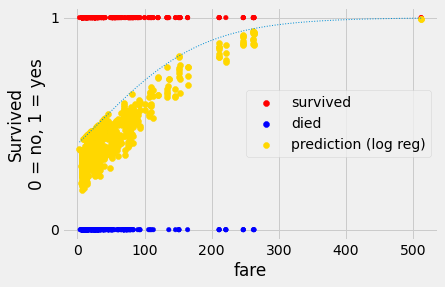

In [25]:
# do not worry about the code in this cell, it just generates the plot
def plot_survive_one_pred(df, predictor):
    # Build plot, add custom labels.
    colors = titanic['survived'].replace(['yes', 'no'], ['red', 'blue'])
    df.plot.scatter(predictor, 'survived_dummy', c=colors)
    plt.ylabel('Survived\n0 = no, 1 = yes')
    plt.yticks([0,1]);  # Just label 0 and 1 on the y axis.
    # Put a custom legend on the plot.  This code is a little obscure.
    plt.scatter([], [], c='red', label='survived')
    plt.scatter([], [], c='blue', label='died')
    # Show the legend
    plt.legend(loc = 'center right');
plot_survive_one_pred(titanic, 'fare')
plt.scatter(fare, predicted_probs_log_reg, color = 'gold', label = 'prediction (log reg)')
plt.legend()
fine_x = np.linspace(np.min(fare), np.max(fare), 1000)
fine_y = intercept_log + slope_fare_log * fine_x
fine_y = inv_logit(fine_y)
plt.plot(fine_x, fine_y, linewidth=1, linestyle=':');

Run the cell below to plot the predicted probabilities, along with `age` and `survived_dummy`:

*Note: the predictions from logistic regression, in this instance, do not form the classic sigmoid shape, however, they are limited to being between 0 and 1*

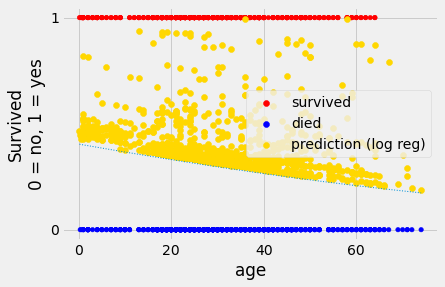

In [26]:
# do not worry about the code in this cell, it just generates the plot
plot_survive_one_pred(titanic, 'age')
plt.scatter(age, predicted_probs_log_reg, color = 'gold', label = 'prediction (log reg)')
plt.legend()
fine_x = np.linspace(np.min(age), np.max(age), 1000)
fine_y = intercept_log + slope_age_log * fine_x
fine_y = inv_logit(fine_y)
plt.plot(fine_x, fine_y, linewidth=1, linestyle=':');

Do you think the patterns shown in these graphs are consistent with the slopes that `minimize` and Statsmodels found?

Remember that the slopes tell us that the odds ratio of survival gets smaller as `age` increases, and larger as `fare` increases. 

*Note: the odds ratio of survival and the probability of survival are related, as one increases so will the other, and vice versa.*

Run the cell below to see a 3D plot of the predicted probabilities, and see if you think you can see this pattern.

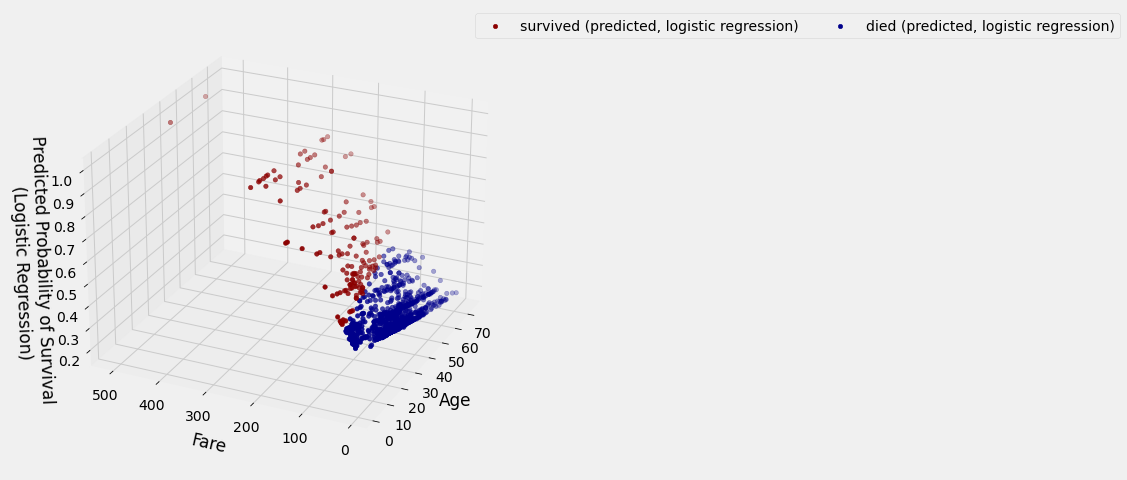

In [27]:
# run this cell, do not worry about the code, it just generates the plot. BUT if you want to, change the value of `azim` and 
# re-run the cell to rotate the plot, to get a different view of the data

azim = 205   # if you want to re-set the graph, the original `azim` value wsa 205

# do not alter the code below this point

fig2 = plt.figure(figsize = (10,8))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.scatter(age[predicted_probs_log_reg >= 0.5], fare[predicted_probs_log_reg >= 0.5], predicted_probs_log_reg[predicted_probs_log_reg >= 0.5], 
           label = 'survived (predicted, logistic regression)', color = 'darkred')
                                           
ax2.scatter(age[predicted_probs_log_reg < 0.5], fare[predicted_probs_log_reg < 0.5], predicted_probs_log_reg[predicted_probs_log_reg< 0.5],
           label = 'died (predicted, logistic regression)', color = 'darkblue')
plt.xlabel('\nAge')
plt.ylabel('\nFare')
plt.legend(loc='upper center', bbox_to_anchor=(1.6, 1), ncol = 3)
ax2.set_zlabel('\nPredicted Probability of Survival \n(Logistic Regression)')
ax2.view_init(elev= 25, azim = azim)
plt.show()